<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01332636/blob/main/Arboldedecision_Equipo63.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
##Tecnológico de Monterrey
###Prof.: Luis Eduardo Falcón Morales
## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**

**Equipo 63:**


* Laura Irán González Ojeda - A01794099
* Juan Pablo Bladinieres Martin del Campo - A01793474
* Estefania Abigail Castro Belmont - A01332636
* Alejandra Mendoza Flores - A01793032
* Juan Pablo Noguerón Morales - A01097897



En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [96]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, validation_curve, learning_curve, GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer


from imblearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree
import pydotplus 
from IPython.display import Image


#**Ejercicio-1.** 

In [2]:
# open zipped dataset
with zipfile.ZipFile("/content/SouthGermanCredit.zip") as z:
#with zipfile.ZipFile(path) as z:
   # open the csv file in the dataset
   with z.open("SouthGermanCredit.asc") as f:
       
      # read the dataset
      df = pd.read_table(f, sep=" ")
       
      # display dataset
      df = pd.DataFrame(df)

In [3]:
df

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


In [4]:
df=df.rename(columns= {"laufkont":"status", "laufzeit":"duration",
                    "moral":"credit_history","verw":"purpose","hoehe":"amount",
                    "sparkont": "savings", "beszeit": "employment_duration",
                    "rate": "installment_rate", "famges": "personal_status_sex",
                    "buerge": "other_debtors", "wohnzeit": "present_residence",
                    "verm": "property","alter":"age",
                    "weitkred":"other_installment_plans","wohn": "housing",
                    "bishkred": "number_credits", "beruf": "job",
                    "pers": "people_liable", "telef": "telephone",
                    "gastarb":"foreign_worker", "kredit":"credit_risk"})
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,24,2,3,1987,1,3,2,3,1,...,1,21,3,1,1,2,1,1,2,0
996,1,24,2,0,2303,1,5,4,3,2,...,1,45,3,2,1,3,2,1,2,0
997,4,21,4,0,12680,5,5,4,3,1,...,4,30,3,3,1,4,2,2,2,0
998,2,12,2,3,6468,5,1,2,3,1,...,4,52,3,2,1,4,2,2,2,0


#**Ejercicio-2.**

In [5]:
df.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [9]:
#Separamos variables de entrada vs salida
features = [
  'status', 
  'duration', 
  'credit_history', 
  'purpose', 
  'amount', 
  'savings', 
  'employment_duration', 
  'installment_rate', 
  'personal_status_sex', 
  'other_debtors', 
  'present_residence', 
  'property', 
  'age', 
  'other_installment_plans', 
  'housing', 
  'number_credits', 
  'job', 
  'people_liable', 
  'telephone', 
  'foreign_worker'
]

output = ['credit_risk']

X = df[features]
y = df[output]


In [13]:
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=.15, shuffle=True, random_state=1)
print('Full data features shape ', X.shape)
print('Full data output shape ', y.shape)

print('\nTrainig data features shape ', X_tv.shape)
print('Trainig data output shape ', y_tv.shape)

print('\nTesting data features shape ', X_test.shape)
print('Testing data output shape ', y_test.shape)


Full data features shape  (1000, 20)
Full data output shape  (1000, 1)

Trainig data features shape  (850, 20)
Trainig data output shape  (850, 1)

Testing data features shape  (150, 20)
Testing data output shape  (150, 1)


#**Ejercicio-3.**

Como una primera aproximación (baseline) realizarás las siguientes transformaciones mínimas para generar los primeros modelos. En la misma página de la UCI se indica el tipo de variable de cada uno de los factores. Definen cuatro tipo de variables: categórica (categorical), ordinal (discretized quantitative), numérica (quantitative) y binaria (binary). Con base a dicha 
información realiza un Pipeline que incluya al menos las siguientes transformaciones:

a.  Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso). 

b.  Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable. 

c.  Aplica la transformación One-Hot encoding a las variables de entrada de tipo categórico y binaria. En particular, justifica por qué una variable binaria requeriría que se le aplique  la transformación one-hot encoding. Por el momento dejar las variables ordinales sin 
transformar. 

In [16]:
#Categóricas, cuant. discretas., cuantitativas y binarias

categorical_features = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing']
quantitative_features = ['duration', 'age', 'amount']
ordinal_features = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits', 'job']
binary_features = ['people_liable', 'telephone', 'foreign_worker']


#Análisis a las variables numéricas
print('Análisis para variables numéricas\n\n')
print(X_tv[quantitative_features].describe() , '\n')

Análisis para variables numéricas


         duration         age        amount
count  850.000000  850.000000    850.000000
mean    20.901176   35.696471   3315.543529
std     12.073279   11.339170   2834.658875
min      4.000000   19.000000    250.000000
25%     12.000000   27.000000   1378.000000
50%     18.000000   33.000000   2356.000000
75%     24.000000   42.000000   3987.250000
max     72.000000   75.000000  18424.000000 



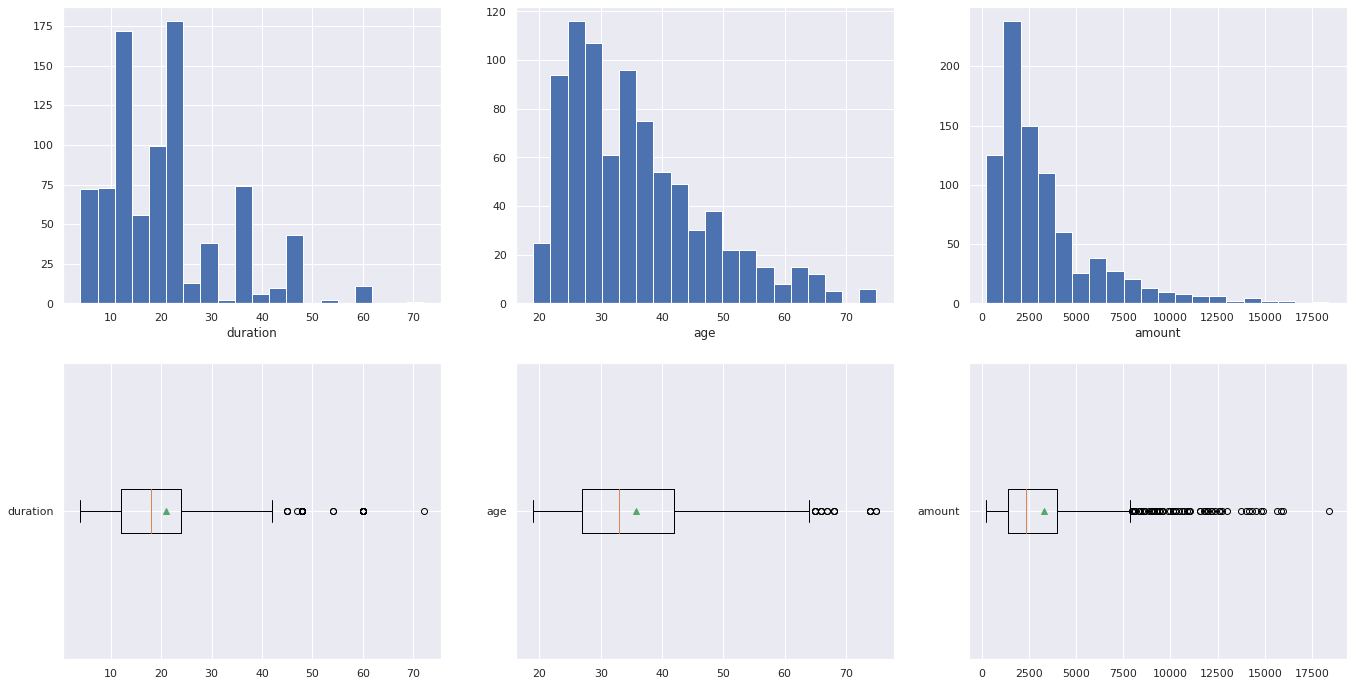

,duration,age,amount
354,6,42,1346
970,48,33,4844
8,18,65,1098
581,24,33,2359
56,12,63,1655
...,...,...,...
767,18,32,1530
72,36,39,2299
908,24,43,1333
235,24,55,1603


In [17]:
sns.set(rc={'figure.figsize':(23,12)})

fig, axes = plt.subplots(2, 3)    # Definimos nicho
for k in range(0,3):
  plt.subplot(2, 3, k + 1)
  plt.hist(X_tv[quantitative_features[k]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(quantitative_features[k])
  
  plt.subplot(2, 3, k + 4)
  plt.boxplot(X_tv[quantitative_features[k]], vert = False, showmeans = True, labels = quantitative_features[k : k + 1] )

plt.show()
#Se observan algunos outliers, por lo que mediana parece mejor opción que media para la imputación


X_tv[quantitative_features]


En el caso de los datos numéricos elegimos sustituir los valores faltantes con la mediana, ya que hay valores extremos (outliers) que nos moverían mucho la media. 

Para el caso de los datos categóricos elegimos la moda.

Los datos binarios los pusimos en 0-1 (One-Hot encoding) porque inicialmente, a pesar de ser binarios tenían valores que podían ser confundidos con categóricos, como datos 1-2 en lugar de 0 y 1. Una imputación One- Hot ENcoding a las variables binarias tiene como finalidad evitar una jerarquización de los valores binarios, es decir, con el fin de evitar que una clase tenga mayor valor (influencia) sobre la otra por la magnitud del valor numérico asignado.

In [19]:
# Transformaciones a factores numéricos de entrada:
cuant_pipeline = Pipeline(steps = [('impute_mediana', SimpleImputer(strategy='median')),
                                 ('escala_cuant', MinMaxScaler(feature_range=(1,2))),
                                 ('Square Root step', FunctionTransformer(np.sqrt))])   
cuant_pipeline_nombres = quantitative_features

# Transformaciones a factores CATEGÓRICOS de entrada:
categoricas_Imp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = categorical_features

# Transformaciones one-hot-encoder en algunas de las categóricas (binarias):
catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = categorical_features + binary_features

# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
columnasTransformer = ColumnTransformer(transformers = [('cuantpipe', cuant_pipeline, cuant_pipeline_nombres),
                                                        ('catimp', categoricas_Imp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#categorical_features = ['status', 'credit_history', 'purpose', 'savings', 'personal_status_sex', 'other_debtors', 'other_installment_plans', 'housing']
#quantitative_features = ['duration', 'age', 'amount']
#ordinal_features = ['employment_duration', 'installment_rate', 'present_residence', 'property', 'number_credits', 'job']
#binary_features = ['people_liable', 'telephone', 'foreign_worker']

* Transformación de factores numéricos:
En el caso de los datos numéricos elegimos sustituir los valores faltantes con la mediana, ya que hay valores extremos (outliers) que nos moverían mucho la media. Se escalaron los valores y finalmente se les aplicó una raíz cuadrada para centrar los datos, ya que en el análisis detectamos un sesgo positivo. 

* Transformación de factores categóricos
Para el caso de los datos categóricos elegimos sustituir los valores faltantes por la moda.

* Transformación de factores categóricos y binarios
Los datos binarios los pusimos en 0-1 (One-Hot encoding) porque inicialmente, a pesar de ser binarios tenían valores que podían ser confundidos con categóricos, como datos 1-2 en lugar de 0 y 1. Una imputación One- Hot ENcoding a las variables binarias tiene como finalidad evitar una jerarquización de los valores binarios, es decir, con el fin de evitar que una clase tenga mayor valor (influencia) sobre la otra por la magnitud del valor numérico asignado.

#**Ejercicio-4.**

4.   Llevarás un entrenamiento usando validación cruzada entre los siguientes tres modelos de aprendizaje automático: Regresión Logística, Árbol de Decisión y Bosque Aleatorio. Deberás llevar a cabo el entrenamiento de los tres de manera conjunta usando un ciclo FOR. Recuerda aplicar las transformaciones que definiste en tu Pipeline. El entrenamiento debe ser con las siguientes características: 

  a.  Usa los parámetros predeterminados de cada modelo.  
  
  b.  En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision, recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn. Sin embargo, sí puedes usar la información regresada por el método confusion_matrix() 
de scikit-learn para definir las métricas).
  
  c.  Usar validación cruzada estratificada con 5 particiones y con 3 repeticiones.  
  
  d.  Imprimir el valor de todas estas métricas, tanto para los datos de entrenamiento, como para los de validación. Así como los diagramas de caja y bigotes de los tres modelos con la métrica “recall”. ¿Alguno de los modelos está subentrenado o sobreentrenado? Justifica tu respuesta. 

In [21]:
def get_models():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DTC')
  
  # BA - Bosque Aleatorio
  modelos.append(RandomForestClassifier())
  nombres.append('RFC')

  
  return modelos, nombres

In [22]:
def my_accuracy(y_real, y_hat):
  cm = confusion_matrix(y_real, y_hat).ravel()
  vn = cm[0]
  fp = cm[1]
  fn = cm[2]
  vp = cm[3]

  return (vp + vn) / (vp + vn + fp + fn)

In [23]:
def my_precission(y_real, y_hat):
  cm = confusion_matrix(y_real, y_hat).ravel()
  vn = cm[0]
  fp = cm[1]
  fn = cm[2]
  vp = cm[3]

  return vp / (vp + fp)

In [24]:
def my_recall(y_real, y_hat):
  cm = confusion_matrix(y_real, y_hat).ravel()
  vn = cm[0]
  fp = cm[1]
  fn = cm[2]
  vp = cm[3]

  return vp / (vp + fn)


In [25]:
def my_f1_score(y_real, y_hat):
  cm = confusion_matrix(y_real, y_hat).ravel()
  vn = cm[0]
  fp = cm[1]
  fn = cm[2]
  vp = cm[3]
  return (2 * vp) / ((2 * vp) + fp + fn)


In [26]:
def my_gmean(y_real, y_hat):
  cm = confusion_matrix(y_real, y_hat).ravel()
  vn = cm[0]
  fp = cm[1]
  fn = cm[2]
  vp = cm[3]
  recall = vp / (vp + fn)
  specificity = vn / (vn + fp)

  return np.sqrt(recall * specificity)


In [36]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
metricas = {'accuracy':make_scorer(my_accuracy), 'recall':make_scorer(my_recall), 'gmean':make_scorer(my_gmean),'precission':make_scorer(my_precission),
            'f1_score':make_scorer(my_f1_score) }
resultados = list()   

for i in range(len(modelos)):

  pipeline = Pipeline(steps=[('ct',columnasTransformer),('m',modelos[i])])

  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=2)
  scores = cross_validate(estimator = pipeline,X= X_tv,y=np.ravel(y_tv),  scoring=metricas, cv=cv, return_train_score = True)

  resultados.append(scores)
  
  print(""">> %s - Training:
    Mean Accuracy: %.3f
    Mean Precission: %.3f
    Mean Recall: %.3f
    Mean F1: %.3f
    Mean Gmean: %.3f
    """ 
  % (nombres[i], np.mean(scores['train_accuracy']), np.mean(scores['train_precission']), np.mean(scores['train_recall']),  np.mean(scores['train_f1_score']),  np.mean(scores['train_gmean']))
  )

  print(""">> %s - Validation:
    Mean Accuracy: %.3f
    Mean Precission: %.3f
    Mean Recall: %.3f
    Mean F1: %.3f
    Mean Gmean: %.3f
    """ 
  % (nombres[i], np.mean(scores['test_accuracy']), np.mean(scores['test_precission']), np.mean(scores['test_recall']),  np.mean(scores['test_f1_score']),  np.mean(scores['test_gmean']))
  )


>> LR - Training:
    Mean Accuracy: 0.790
    Mean Precission: 0.820
    Mean Recall: 0.895
    Mean F1: 0.856
    Mean Gmean: 0.701
    
>> LR - Validation:
    Mean Accuracy: 0.755
    Mean Precission: 0.801
    Mean Recall: 0.864
    Mean F1: 0.831
    Mean Gmean: 0.659
    
>> DTC - Training:
    Mean Accuracy: 1.000
    Mean Precission: 1.000
    Mean Recall: 1.000
    Mean F1: 1.000
    Mean Gmean: 1.000
    
>> DTC - Validation:
    Mean Accuracy: 0.690
    Mean Precission: 0.784
    Mean Recall: 0.766
    Mean F1: 0.774
    Mean Gmean: 0.628
    
>> RFC - Training:
    Mean Accuracy: 1.000
    Mean Precission: 1.000
    Mean Recall: 1.000
    Mean F1: 1.000
    Mean Gmean: 1.000
    
>> RFC - Validation:
    Mean Accuracy: 0.766
    Mean Precission: 0.797
    Mean Recall: 0.891
    Mean F1: 0.841
    Mean Gmean: 0.651
    


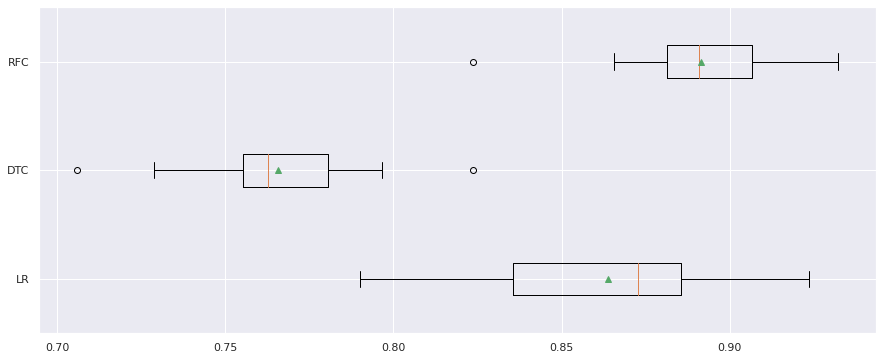

In [42]:
#Boxplot de los datos de validación
sns.set(rc={'figure.figsize':(15, 6)})

bp_recall = list()

for i in range(len(resultados)):
  results = resultados[i]['test_recall']
  bp_recall.append(results)

bp_recall
plt.boxplot(bp_recall, labels = nombres, showmeans=True, vert = False)
plt.show()


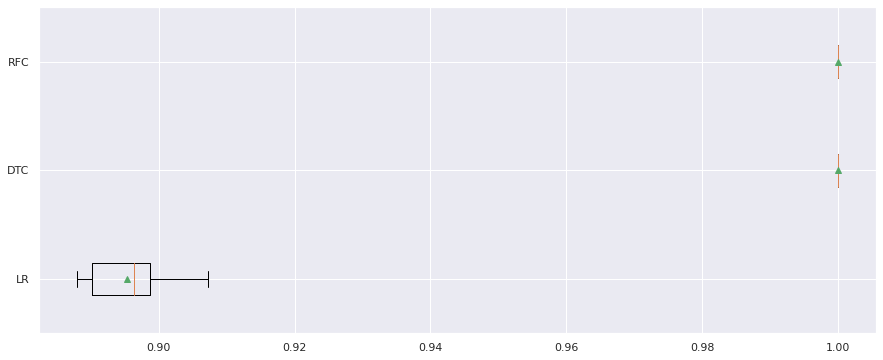

In [43]:
#Boxplot de los datos de entrenamiento
sns.set(rc={'figure.figsize':(15, 6)})

bp_recall = list()

for i in range(len(resultados)):
  results = resultados[i]['train_recall']
  bp_recall.append(results)

bp_recall
plt.boxplot(bp_recall, labels = nombres, showmeans=True, vert = False)
plt.show()

e.  En particular obtengamos algunas de las llamadas curvas de aprendizaje para algunos de 
estos casos. En dada gráfico debes incluir tus comentarios sobre el modelo generado: 
    i.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del 
desempeño de dicha función “learning_curve()”.  
    ii.  Obtener las curvas de validación (validation_curve) en la cual se va incrementando la complejidad del hiperparámetro “max_depth” para el modelo de árbol de decisión con sus hiperparámetros predeterminados. Utilizar valores de máxima profundidad desde 1 hasta 20 y con la métrica “f1-score” para la evaluación del desempeño del modelo.  
    iii.  Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo. 

In [90]:
# Curve plot creation
def LearningCurvePlot(train_sizes, train_scores, val_scores):

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    #plt.ylabel('Exactitud (accuracy)')
    plt.grid()
    plt.legend(loc='lower left')
    plt.show()

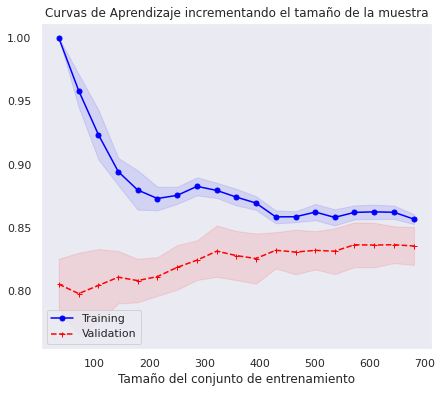

In [91]:
delta_TS = np.linspace(.0001, 1.0, 20)

XTrain_transformed = columnasTransformer.fit_transform(X_tv)
cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

model = LogisticRegression(max_iter = 1000, random_state=  42)

train_sizes, train_scores, test_scores = learning_curve(
  model,
  XTrain_transformed,
  np.ravel(y_tv),
  train_sizes=delta_TS,
  cv=cvLC,
  scoring=make_scorer(my_f1_score),
  n_jobs=-1
  )

LearningCurvePlot(train_sizes,train_scores,test_scores,
#                      title = "Curva de Aprendizaje para el modelo de Regresión Logística",
#                      xlabel = "Tamaño del Conjunto de Entrenamiento",
#                      ylabel = "F1-Score"
)
#LearningCurvePlot(tr_sizes, tr_scores, val_scores)

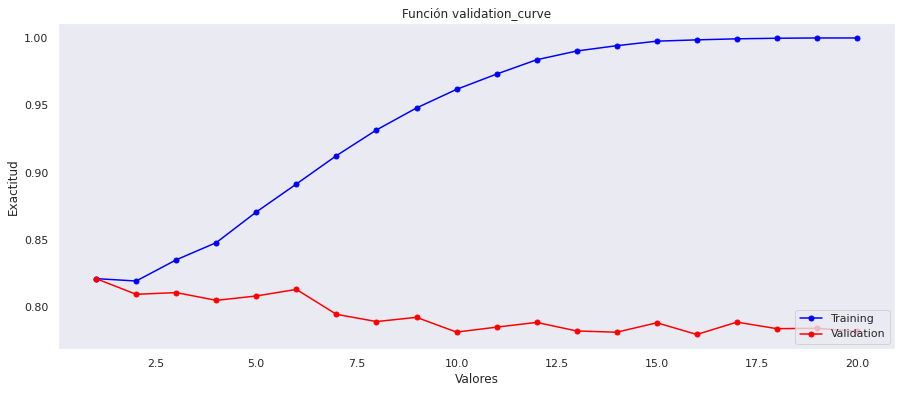

In [67]:
delta_C = np.linspace(1.0, 20, 20) #np.arange(0,1,20)#

modelo = DecisionTreeClassifier(max_depth=20)

Xx = columnasTransformer.fit_transform(X_tv)

cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=10)

train_scores, valid_scores = validation_curve(modelo, 
                                              Xx, 
                                              np.ravel(y_tv), 
                                              param_name="max_depth",
                                              n_jobs = -1,
                                              param_range=delta_C,
                                              cv=cvLC,
                                              scoring=make_scorer(my_f1_score)
                                              )


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve')
plt.xlabel('Valores')
plt.ylabel('Exactitud')
plt.grid()
plt.legend(loc='lower right')
plt.show()

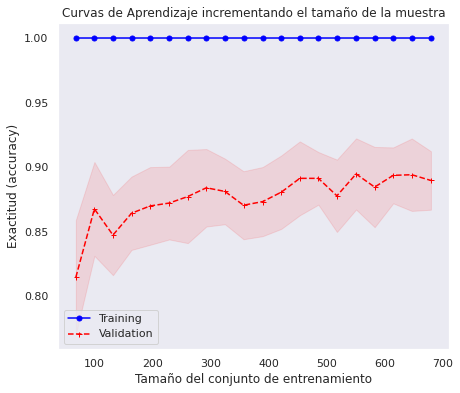

In [74]:
delta_f = np.linspace(.1, 1.0, 20)

XTrain_transformedRF = columnasTransformer.fit_transform(X_tv)
cvLCRF = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

modelRF = RandomForestClassifier()

train_sizes, train_scores, test_scores = learning_curve(
  modelRF,
  XTrain_transformedRF,
  np.ravel(y_tv),
  train_sizes=delta_f,
  cv=cvLCRF,
  scoring=make_scorer(my_recall),
  n_jobs=-1,
  random_state=42,
  )

LearningCurvePlot(train_sizes,train_scores,test_scores)


#**Ejercicio-5.**

Para el modelo de regresión logística realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: C, solver, class_weight y penalty. En este caso deberás usar la métrica (scoring) “f1-score”. Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica f1. ¿Cuál es la utilidad de la métrica “f1-score”? Incluye tus conclusiones. 
NOTA: Toma en cuenta que no todas las combinaciones de “solver” y “penalty” son 
posibles, para que lo tomes en cuenta al momento de realizar la búsqueda. Revisa la documentación. 

In [84]:
modelo_LR = LogisticRegression(max_iter=100, random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42) #Cross Validation

param_grid = {
  'C': [0.01, 0.1, 1, 10, 100, 1000],
  'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
  'class_weight':['balanced', None],
  'penalty': ['l1','l2','elasticnet',None] 
}


grid = GridSearchCV(
    estimator = modelo_LR,
    param_grid=param_grid,
    cv = cv,
    scoring=make_scorer(my_f1_score), 
    n_jobs = -1,
)

XT = columnasTransformer.fit_transform(X_tv)
grid.fit(XT,np.ravel(y_tv))


print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparémetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)


Mejor valor de exactitud obtenido con la mejor combinación: 0.8409448086337635
Mejor combinación de valores encontrados de los hiperparémetros: {'C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga'}
Métrica utilizada: make_scorer(my_f1_score)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
2340 fits failed out of a total of 3600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

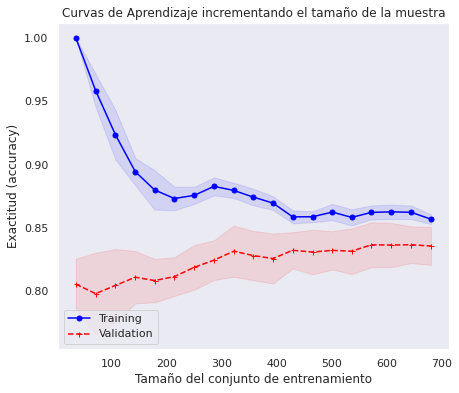

In [86]:
#C': 0.1, 'class_weight': None, 'penalty': 'l2', 'solver': 'saga
delta_TS = np.linspace(.0001, 1.0, 20)

XTrain_transformed = columnasTransformer.fit_transform(X_tv)
cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

model_N_LR = LogisticRegression(C= 0.1, class_weight = None, penalty = 'l2', solver = 'saga', max_iter = 100, random_state=  42)

train_sizes, train_scores, test_scores = learning_curve(
  model,
  XTrain_transformed,
  np.ravel(y_tv),
  train_sizes=delta_TS,
  cv=cvLC,
  scoring=make_scorer(my_f1_score),
  n_jobs=-1
  )

LearningCurvePlot(train_sizes,train_scores,test_scores
)


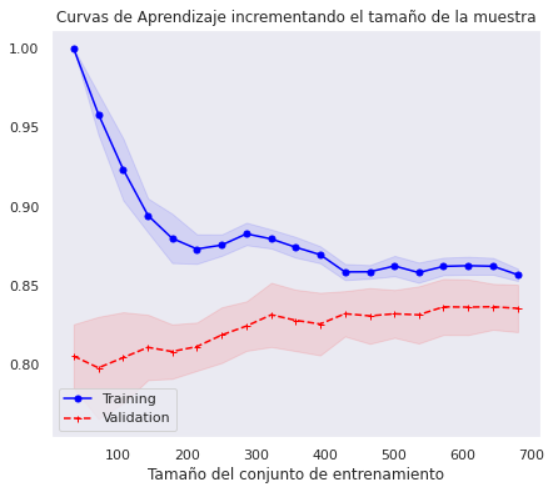

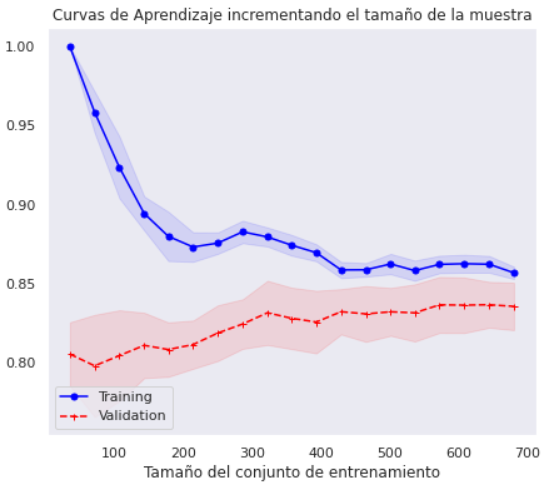

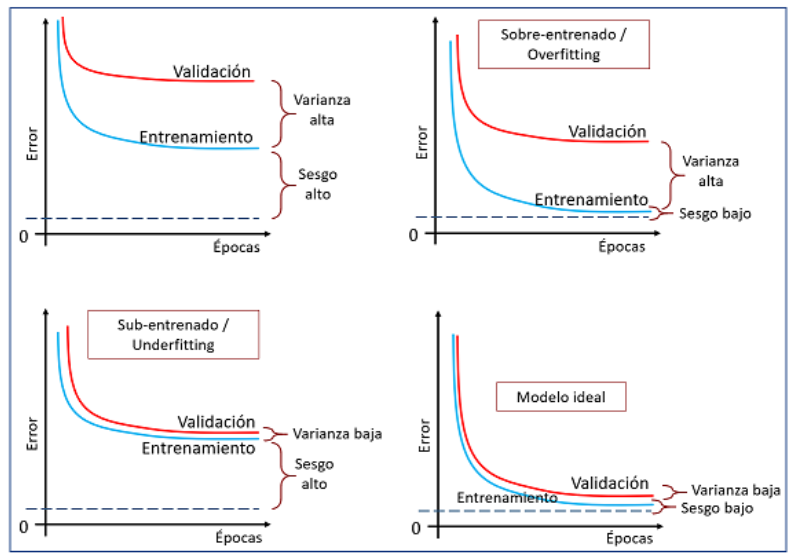

Si comparamos ambos modelos podemos notar que son muy similares. En ambos diminuye la varianza y aumenta el sesgo, lo que nos lleva a conlcuir que el modelo esta **subentrenado**. Con f1 lo que estamos midiendo es la media armónica de los datos, por lo que mientras nuestro modelo se acerque a uno mejora. 

In [87]:
modelo_N_DTC = DecisionTreeClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42) 

param_grid = {
  'ccp_alpha': [0.001, 0.01, 0.1, 0.99],
  'criterion': ['gini', 'entropy', 'log_loss'],
  'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
  'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
  'class_weight': [None, 'balanced']
}


grid = GridSearchCV(
    estimator = modelo_N_DTC,
    param_grid=param_grid,
    cv = cv,
    scoring=make_scorer(my_precission), 
    n_jobs = -1,
)

XT = columnasTransformer.fit_transform(X_tv)
grid.fit(XT,np.ravel(y_tv))


print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparémetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

Mejor valor de exactitud obtenido con la mejor combinación: 0.8750850957203054
Mejor combinación de valores encontrados de los hiperparémetros: {'ccp_alpha': 0.1, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}
Métrica utilizada: make_scorer(my_precission)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
13200 fits failed out of a total of 39600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13200 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_fa

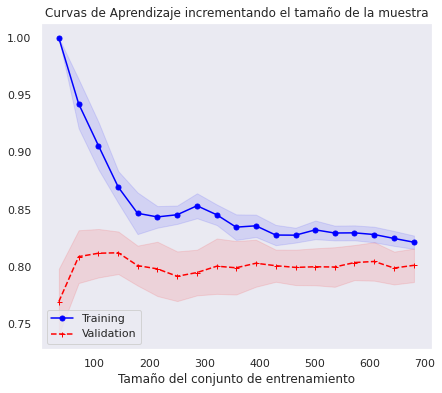

In [93]:
#ccp_alpha': 0.1, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2
delta_TS = np.linspace(.0001, 1.0, 20)

XTrain_transformed = columnasTransformer.fit_transform(X_tv)
cvLC = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

modelo_N_DTC = DecisionTreeClassifier(ccp_alpha= 0.1, class_weight='balanced', criterion= 'entropy', max_depth= 3, min_samples_split= 2)

train_sizes, train_scores, test_scores = learning_curve(
  model,
  XTrain_transformed,
  np.ravel(y_tv),
  train_sizes=delta_TS,
  cv=cvLC,
  scoring=make_scorer(my_precission),
  n_jobs=-1
  )

LearningCurvePlot(train_sizes,train_scores,test_scores
)

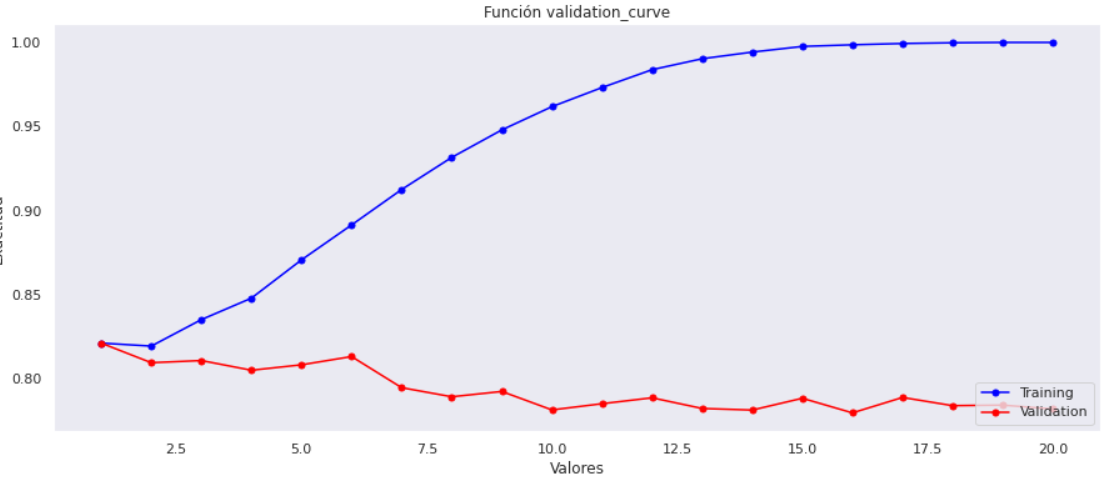

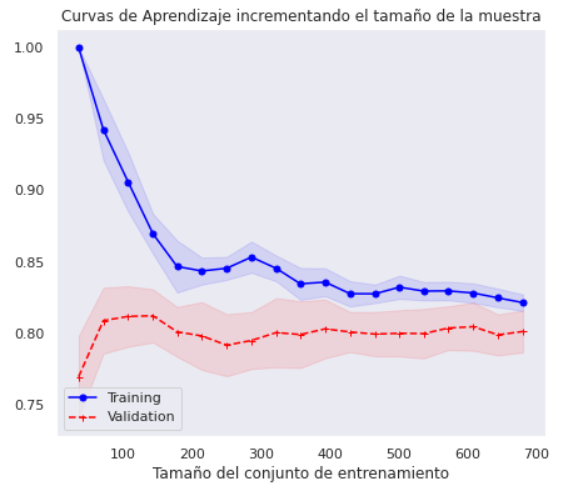

Realmente no podemos comparar las gráficas obtenidas porque una traza la curva de validación y la otra la curva de aprendizaje. Sin embargo, al comparar esta gráfica con la anterior (la de regresión logística), podemos observar una mejoría.

La métrica preccision nos da la cantidad de aciertos que se tienen. Ahí es donde se muestra la mejoría en nuestro modelo.

In [94]:
modelo_N_RFC = RandomForestClassifier(random_state=42)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42) 

param_grid = {
  'ccp_alpha':[0.001, 0.01, 0.1, 1.0], 
  'criterion':['gini', 'entropy', 'log_loss'], 
  'max_depth':[2, 3], 
  'min_samples_split':[2, 3], 
  'class_weight':['balanced', 'balanced_subsample', None]
}



grid = GridSearchCV(
    estimator = modelo_N_RFC,
    param_grid=param_grid,
    cv = cv,
    scoring=make_scorer(my_recall), 
    n_jobs = -1,
#    error_score='raise'
)

XT = columnasTransformer.fit_transform(X_tv)
grid.fit(XT,np.ravel(y_tv))


print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
print('Mejor combinación de valores encontrados de los hiperparémetros:', grid.best_params_)
print('Métrica utilizada:', grid.scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

Mejor valor de exactitud obtenido con la mejor combinación: 1.0
Mejor combinación de valores encontrados de los hiperparémetros: {'ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
Métrica utilizada: make_scorer(my_recall)


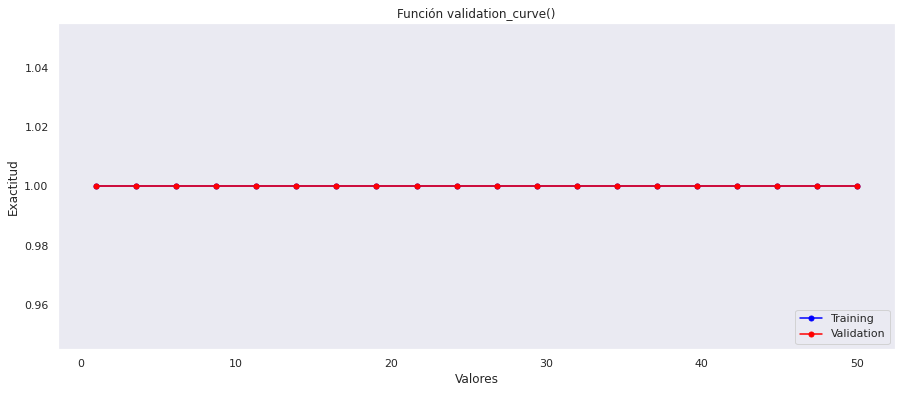

In [95]:
#ccp_alpha': 0.1, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
delta_C = np.linspace(1., 50., 20)

modelo = RandomForestClassifier(ccp_alpha= 0.1, class_weight= None, criterion='gini', max_depth= 2, min_samples_split= 2)

Xx = columnasTransformer.fit_transform(X_tv)

cvLC = RepeatedStratifiedKFold(n_splits=10, n_repeats=5)

train_scores, valid_scores = validation_curve(modelo, 
                                              Xx, 
                                              np.ravel(y_tv), 
                                              param_name="max_depth",
                                              param_range=delta_C,
                                              cv=cvLC,
                                              scoring=make_scorer(my_recall)
                                              )


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)


# Curva de entrenamiento con la métrica de exactitud (accuracy):
plt.plot(delta_C, train_mean, color='blue', marker='o', markersize=5, label='Training')

# Curva de validación:
plt.plot(delta_C, valid_mean, color='red', marker='o', markersize=5, label='Validation')

plt.title('Función validation_curve()')
plt.xlabel('Valores')
plt.ylabel('Exactitud')
plt.grid()
plt.legend(loc='lower right')
plt.show()

E recall es la sensitividad o exhaustividad del porcentaje de aciertos. Entre mayor es, mejor es. 

Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando 
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir 
en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, 
min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) 
“precision”. Imprime la mejor combinación de parámetros obtenidos, así como el valor 
del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de 
la métrica “precision”? Incluye tus conclusiones. 

#**Ejercicio-6.**

In [97]:
RL_model = LogisticRegression(
    C=0.1, 
    class_weight=None, 
    penalty='l2', 
    solver='newton-cg', 
    max_iter=1000, 
    random_state=42
    )

pipe = make_pipeline((RL_model))
pipe.fit(X_tv, y_tv)
Yhat = pipe.predict(X_test)

print ('Accuracy score: %.4f'   % pipe.score(X_test,y_test))
print ('Accuracy score: %.4f'   % my_accuracy (y_test, Yhat))
print ('Precision score: %.4f'  % my_precission(y_test,Yhat))
print ('Recall score: %.4f'     % my_recall(y_test, Yhat))
print ('F1-Score score: %.4f'   % my_f1_score(y_test, Yhat))
print ('Gmean score: %.4f'      % my_gmean (y_test, Yhat))


Accuracy score: 0.7867
Accuracy score: 0.7867
Precision score: 0.8167
Recall score: 0.9074
F1-Score score: 0.8596
Gmean score: 0.6573


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [98]:
DT_model = DecisionTreeClassifier(
    ccp_alpha=0.001, 
    criterion='entropy', 
    max_depth=4, 
    min_samples_split=2, 
    class_weight='balanced', 
    random_state=42
    )

pipe = make_pipeline((DT_model))
pipe.fit(X_tv, y_tv)
Yhat = pipe.predict(X_test)

print ('Accuracy score: %.4f'   % pipe.score(X_test,y_test))
print ('Accuracy score: %.4f'   % my_accuracy (y_test, Yhat))
print ('Precision score: %.4f'  % my_precission(y_test,Yhat))
print ('Recall score: %.4f'     % my_recall(y_test, Yhat))
print ('F1-Score score: %.4f'   % my_f1_score(y_test, Yhat))
print ('Gmean score: %.4f'      % my_gmean (y_test, Yhat))


Accuracy score: 0.5200
Accuracy score: 0.5200
Precision score: 0.8333
Recall score: 0.4167
F1-Score score: 0.5556
Gmean score: 0.5722


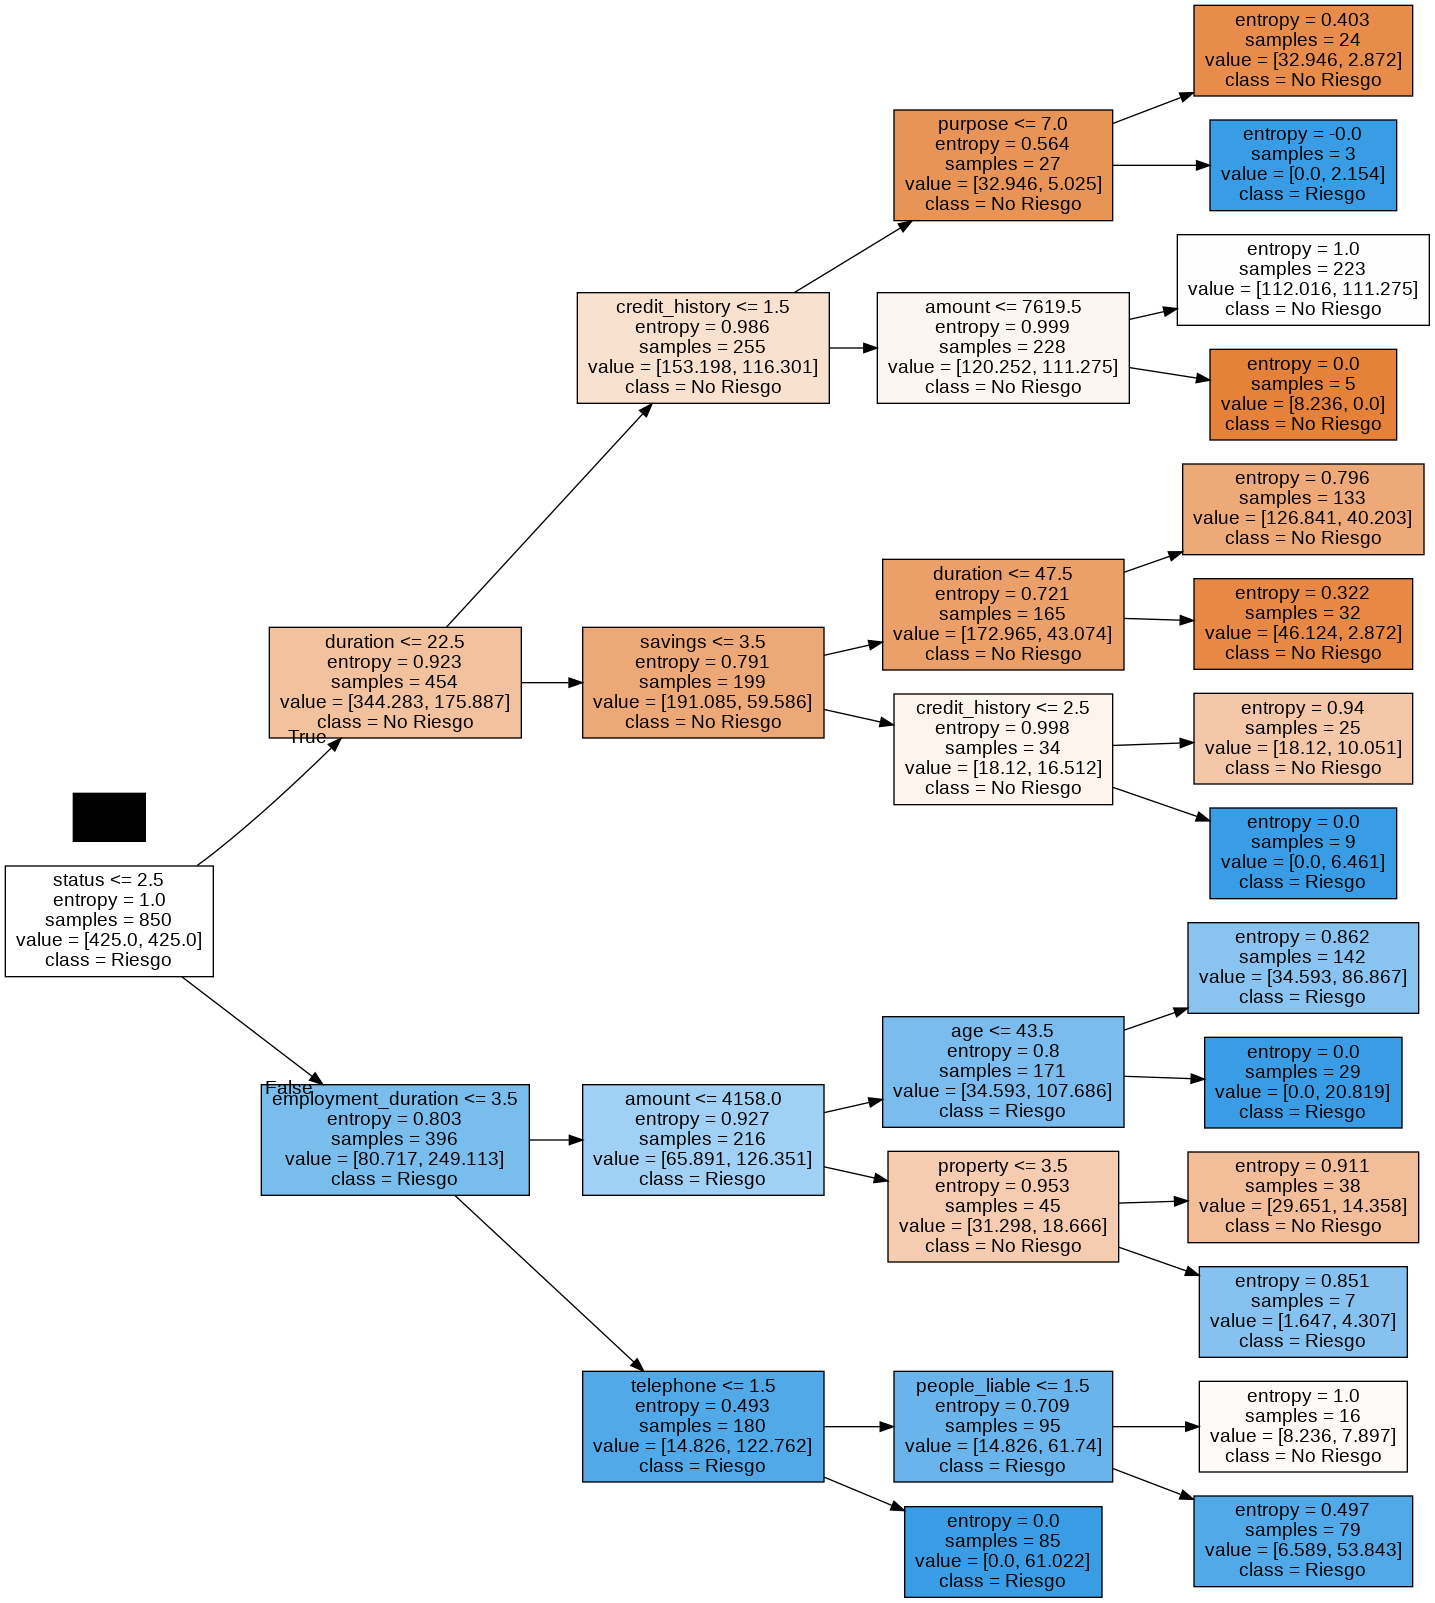

In [99]:
dot_data = tree.export_graphviz(decision_tree=DT_model, 
                                out_file=None,
                                max_depth=None,
                                feature_names=list(pd.DataFrame(X_tv).columns.values),
                                class_names=['No Riesgo', 'Riesgo'],
                                filled=True,
                                rotate=True,
                                proportion=False)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [100]:
RF_model = RandomForestClassifier(
    ccp_alpha=0.1, 
    class_weight=None, 
    criterion='gini', 
    max_depth=3, 
    min_samples_split=2
    )

pipe = make_pipeline((RF_model))
pipe.fit(X_tv, y_tv)
Yhat = pipe.predict(X_test)

print ('Accuracy score: %.4f'   % pipe.score(X_test,y_test))
print ('Accuracy score: %.4f'   % my_accuracy (y_test, Yhat))
print ('Precision score: %.4f'  % my_precission(y_test,Yhat))
print ('Recall score: %.4f'     % my_recall(y_test, Yhat))
print ('F1-Score score: %.4f'   % my_f1_score(y_test, Yhat))
print ('Gmean score: %.4f'      % my_gmean (y_test, Yhat))


Accuracy score: 0.7200
Accuracy score: 0.7200
Precision score: 0.7200
Recall score: 1.0000
F1-Score score: 0.8372
Gmean score: 0.0000


/usr/local/lib/python3.7/dist-packages/imblearn/pipeline.py:266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


###**Fin de la Actividad de la semana 6.**